<h1><center>SCI KIT APPLICATIONS. CLASSIFICATION</center></h1>
<h2><center> HANDWRITING RECOGNITION</center></h2>


## 1. GENERAL CONCEPTS

### 1.1. DEFINITIONS

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are unlabelled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The support-vector clustering[2] algorithm, created by Hava Siegelmann and Vladimir Vapnik, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial application

### 1.2. SVM VS. DEEP LEARNING

Many authors of papers I read affirm SVMs is superior technique to face their regression/classification problem, aware that they couldn't get similar results through NNs. Often the comparison states that

SVMs, instead of NNs,

- Have a strong founding theory
- Reach the global optimum due to quadratic programming
- Have no issue for choosing a proper number of parameters
- Are less prone to overfitting
- Needs less memory to store the predictive model
- Yield more readable results and a geometrical interpretation


## 2. PREPARATION OF THE DATA SET

In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 4 images, stored in the **images**  attribute of the dataset.  If we were working from image files, we could load them using matplotlib.pyplot.imread.  Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.

- Data Set Characteristics:
- Number of Instances: 5620
- Number of Attributes: 64
- Attribute Information: 8x8 image of integer pixels in the range 0..16.
- Missing Attribute Values: None
- Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
- Date: July; 1998



This is a copy of the test set of the UCI ML hand-written digits datasets

http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits


The data set contains images of hand-written digits: 10 classes where each class refers to a digit.


Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. 

This reduces dimensionality and gives invariance to small distortions. 


### THE DIGITS DATA SET

In [2]:
digits = datasets.load_digits()

In [3]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### FLATTENING THE DATA SETS

In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

## 2. CREATING A CLASSIFIER

In [6]:
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train);

### 3. MAKING THE PREDICTION

In [7]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

In [8]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




In [19]:
confusion=metrics.confusion_matrix(predicted, y_test)

## 4. VISUALIZATION OF THE RESULTS

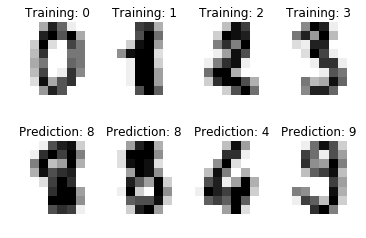

In [43]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()

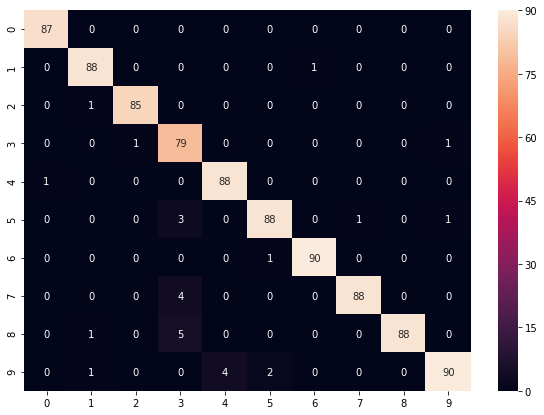

In [29]:
import seaborn as sn
import pandas as pd

array = confusion
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True);
plt.show()